In [1]:
from data_generator import make_data
from src.module.tools import compute_matrice_specialisaton

# Exemple d'utilisation du module

## 1. Données d'illustration

In [2]:
# génération aléatoires de données
data = make_data(seed=0)

### Info données

In [3]:
data['info_data']

{'nombre de taches': 50,
 'nombre utilisateurs': 10,
 'nombre competences': 7,
 'nombre projets': 20}

### Tâches

Chaque tâche est caractérisée par une durée, un projet, et une compétence nécéssaire à son accomplissement.

In [4]:
data['tasks'].head()

,id,duree,projet,competence
0,0,7,5,0
1,1,2,9,4
2,2,5,3,5
3,3,5,0,5
4,4,9,5,6


## Capacités utilisateurs

Pour la période de sprint à plannifier, il faut indiquer les disponibilités des utilisateurs.

In [5]:
data['capacite_utilisateur']

,disposable_time
id_user,
0,29.0
1,33.0
2,45.0
3,39.0
4,32.0
5,25.0
6,32.0
7,44.0
8,37.0


### Matrice compétences

Chaque utilisateur dispose d'un score allant de 0 à 3 pour chaque compétence.

In [6]:
data['matrice_competence'].head()

id_user,0,1,2,3,4,5,6,7,8,9
competence,,,,,,,,,,
0,2,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,1,0,0,0,1
2,3,0,1,0,0,0,2,0,0,2
3,0,0,0,0,0,0,0,0,1,0
4,2,0,0,1,0,0,0,0,0,1


### Notion de matrice de spécialisation :

La matrice spécialité permet de mettre en avant le fait que si une personne A n'a que peu de compétences (avec niveau faible), il vaut dans ce cas mieux, dès qu'une tâche relève de sa compétence, assigner cette tâche à cette personne A plutôt qu'a une personne B, plus qualifiée mais avec un panel de compétences plus large, car il vaut mieux laisser plus de champs à B, c'est peut-être un chef d'équipe ou il aura d'autre choses à faire que A ne sait pas faire.

Illustration ci-dessous.

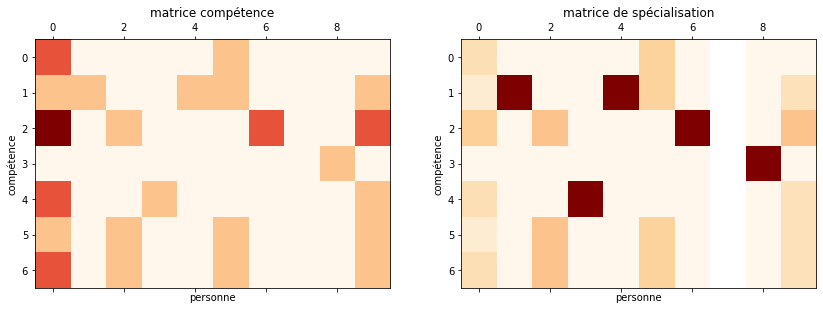

In [7]:
import matplotlib.pyplot as plt
mat = data['matrice_competence'].values
plt.figure(figsize=(14,7))
cmap = 'OrRd'
ax1 = plt.subplot(121,title='matrice compétence',xlabel='personne',ylabel='compétence')
ax1.matshow(mat,cmap=cmap)


ax2 = plt.subplot(122,title='matrice de spécialisation',xlabel='personne',ylabel='compétence')
ax2.matshow(compute_matrice_specialisaton(mat),cmap=cmap);

Blanc : zéro, Rouge foncé : max.


Dans la matrice de compétence, on observe la personne 3 est moins qualifiée que personne 0 pour la compétence 4. Hors la personne 3 ne sait pas faire autre chose que la compétence 4. Ainsi il est préférable de lui donner de la compétence 4 dès qu'il y en a. C'est ce que retranscrit la matrice de spécialisation.

### Matrice projet

Les utilisateurs sont impliqués ou non dans les projets.

In [8]:
data['matrice_projet'].head()

id_user,0,1,2,3,4,5,6,7,8,9
projet,,,,,,,,,,
0,1,0,1,1,0,1,0,1,1,0
1,0,1,1,0,1,1,1,1,1,1
2,0,0,1,0,1,0,0,1,1,1
3,1,1,0,1,1,1,0,0,1,1
4,0,1,1,1,0,0,0,1,0,0


## 2. Résolution

in current directory, run the following command :

$uvicorn run --port 8001 --reload src.main:app

In [9]:
import requests
url = 'http://127.0.0.1:8000/solve/'

new_data= {
    'tasks':data['tasks'].to_json(),
    'capacite_utilisateur':data['capacite_utilisateur'].to_json(),
    'matrice_competence':data['matrice_competence'].to_json(),
    'matrice_projet':data['matrice_projet'].to_json(),
    "curseur_politique":1.0
}

resp = requests.post(url=url, json=new_data)
result = resp.json()

### assignation des tâches

In [10]:
import pandas as pd
pd.DataFrame(result['solution']).head(10)

,ID Task,ID User,Durée (h)
0,2,5,3.0
1,3,2,3.0
2,3,5,2.0
3,6,3,5.0
4,8,3,4.0
5,9,4,6.0
6,10,0,9.0
7,11,9,8.0
8,13,4,10.0
9,15,4,8.0


### charges des utilisateurs

In [11]:
pd.DataFrame(result['statistics']['charge_utilisateurs']).head(10)

,user_id,disposable_time_(h),assigned_hours,busy_time_percent
0,0,29,29.0,100.0
1,1,33,8.0,24.0
2,2,45,45.0,100.0
3,3,39,22.0,56.0
4,4,32,32.0,100.0
5,5,25,25.0,100.0
6,6,32,0.0,0.0
7,7,44,0.0,0.0
8,8,37,21.0,57.0
9,9,40,40.0,100.0


### heures non assignées

In [12]:
result['statistics']['total_heures_non_assignees']

98.0